# Proyecto Open Data I y II

## Explicacion del proyecto: 

En este proyecto trateremos de predecir si el cliente abandonara o no la compañia telefonica. Utilizaremos un set de datos que nos ha proporcionado Kaggle. 
Las variable son:

* State: Es el estado en donde se encuentra el cliente.
* Account length: es el tamaño de la cuenta.
* Area code: Son los 3 primeros digitos de una serie de 9 digitos que componen un numero de telefono y que definen en que parte de estados unidos se encuentra el cliente.
* Phone numbre: es el numero de telefono del cliente.
* International plan: esta variable nos dice si el usuario tiene o no tiene un plan de llamadas internacional.
* Voice mail plan: esta variable nos dice si el cliente tiene o no un plan de mensages de voz.
* Numbre vmail messages: es el numero de mensages de voz enviados.
* Total day minutes: es el total de minutos de llamada realizado durante la mañana.
* Total day calls: es el total de llamadas realizadas por el cliente durante la mañana.
* Total day charge: es el total que paga el cliente por sus servicios de la mañana.
* Total eve minutes: es el total de minutos de llamada realizado durante la tarde.
* Total eve calls: es el total de llamadas realizadas por el cliente durante la tarde.
* Total eve charge: es el total que paga el cliente por sus servicios de la tarde.
* Total night minutes: es el total de minutos de llamada realizado durante la noche.
* Total night calls: es el total de llamadas realizadas por el cliente durante la noche.
* Total night charge: es el total que paga el cliente por sus servicios de la noche.
* Total intl minutes: es el total de minutos en llamadas internacionales realizados por el cliente.
* Total intl calls: es el total de llamas realizadas por el cliente al extranjero.
* Total intl charge: es el total que paga el cliente por su servicio en llamadas internacionales
* Customer service calls: es el numero de llamadas realizadas por el cliente a atencion al cliente.
* Churn: es el numero de abandonos de la compañia y es nuestra variable objetivo.

Una vez sabemos todas las variables empezamos descargando todos 
los paquetes necesarios para realizar nuestro proyecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
import scipy.stats as stat

Una vez descargados los datos, descargamos nuestro set de datos y lo 
guardamos en una variable que vamos a llamar DataSet.

In [2]:
DataSet = pd.read_csv('OpenData-DataSet.csv',header=0)

Hechamos un pequeño vistazo a nuestro DataSet para ver que todo esta correcto con el .head()

In [10]:
DataSet.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Investigando en los datos me he podido fijar en que el data ser no esta basado en hechos reales. Primero porque los area code no coinciden con los area code de verdad, los cuales estan colocados en esta pagina web: https://www.50states.com/areacodes/. Despues como se puede comprobar tambien los usuarios que tienen plan internacional pagan los mismo a llamadas internacionales que los que no. 

Una vez vemos que todo esta correcto chequeamos que no nos falte
ningun valor dentro de nuestro set de datos.

In [5]:
print(DataSet.isnull().values.any())

False


Como podemos comprobar no hay ningun valor nuelo o vacio dentro de nuestro DataSet.

Antes de empezar con la exploracion vamos a cambiar los Strings que 
contienen 'yes' y 'no'por booleanos para que nos resulte mas facil hacerla.

In [3]:
DataSet = DataSet.replace({'international plan': {'yes': True, 'no': False}})
DataSet = DataSet.replace({'voice mail plan': {'yes': True, 'no': False}})

Vamos a hacer un histograma de todos los minutos, es decir, mañana, tarde, noche e internacionales, para ver como se distribuye nuestra poblacion.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000483C4139B0>]],
      dtype=object)

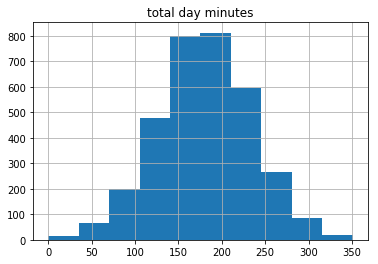

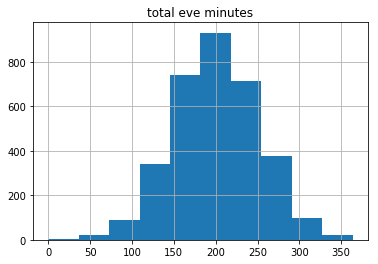

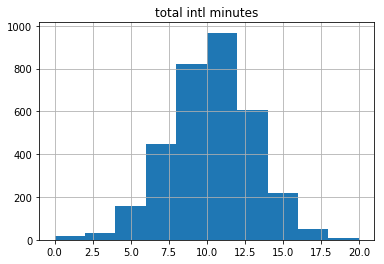

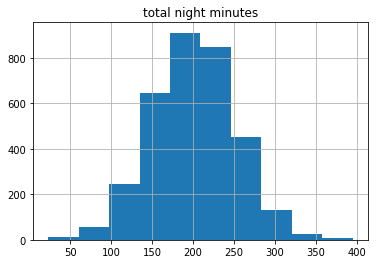

In [47]:
DataSet.hist(column='total day minutes')
DataSet.hist(column ='total eve minutes')
DataSet.hist(column ='total intl minutes')
DataSet.hist(column ='total night minutes')



Despues hacemos un mapa de correlacion para ver cuales 
son las variables que estan mas correladas con nuestra variable objetivo.

In [4]:
corr = DataSet.corr()
corr

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,0.024735,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,0.048551,-0.000747,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
international plan,0.024735,0.048551,1.000000,0.006006,0.008745,0.049396,0.003755,0.049398,0.019100,0.006114,0.019106,-0.028905,0.012451,-0.028913,0.045871,0.017366,0.045780,-0.024522,0.259852
voice mail plan,0.002918,-0.000747,0.006006,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.001276,-0.017824,-0.102148
number vmail messages,-0.004628,-0.001994,0.008745,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.049396,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,0.003755,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.049398,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.019100,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,0.006114,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233


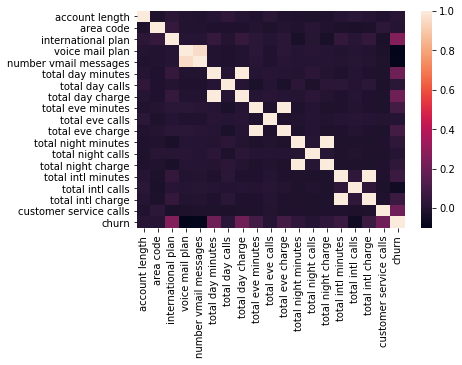

In [6]:
sns.heatmap(corr)

Viendo este mapa de calor se puede apreciar que las variables mas correlacionadas son las que se realizan en el mismo periodo del dia, por ejemplo, la variable 'total int minutes' esta fuertemente relacionada con 'total intl charge' ya que para poder llamar necesitas pagarlas.

Hacemos una lista con las variables mas correlacionadas y vemos cuales son las 10 mas correlacionadas.

In [32]:
c = DataSet.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

#so['churn']
so.tail(41)

churn                   total eve minutes         0.092796
total eve minutes       churn                     0.092796
churn                   voice mail plan           0.102148
voice mail plan         churn                     0.102148
total day charge        churn                     0.205151
churn                   total day charge          0.205151
total day minutes       churn                     0.205151
churn                   total day minutes         0.205151
customer service calls  churn                     0.208750
churn                   customer service calls    0.208750
                        international plan        0.259852
international plan      churn                     0.259852
voice mail plan         number vmail messages     0.956927
number vmail messages   voice mail plan           0.956927
total intl charge       total intl minutes        0.999993
total intl minutes      total intl charge         0.999993
total night charge      total night minutes       0.9999

Mirando en esta lista vemos que las variables mas correlacionadas entre ellas son: 
*  total day charge   -   total day minutes
*  total eve charge   -   total eve minutes
*  total night charge  -  total night minutes
*  total intl charge  -   total intl minutes
*  number vmail messages  -  voice mail plan
*  international plan  -  churn
*  customer service calls - churn 
*  total day minutes   -  churn
*  voice mail plan    -   churn
*  total eve minutes   -  churn




Como ya tenemos nuestra variable objetivo (churn), vamos a hacer la exploracion entorno a esta. Para ello lo primero que hacemos es hacer un histograma para ver cuanta gente se ha ido y cuanta se ha quedado.



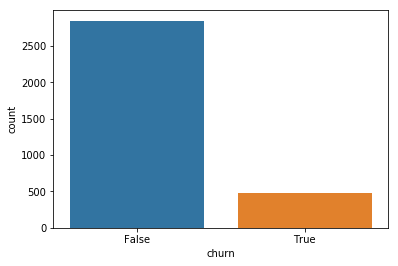

In [11]:
sns.countplot(x ='churn', data=DataSet)

Como podemos observar hay bastante mas gente que se queda que las que se van.



C:\Users\Ernesto\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


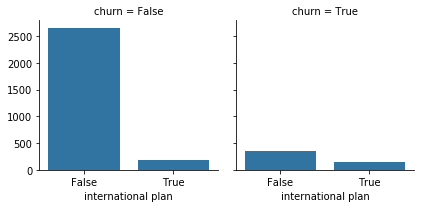

In [19]:
g = sns.FacetGrid(DataSet, col="churn")
g.map(sns.countplot, "international plan" )

Como podemos observar en esta grafica hay mas o menos el mismo numero de personas que se marchan de la compañia que tiene el plan internacional. Esto puede indicar que el plan internacional no funciona suficientemente bien y el cliente no esta satisfecho.

C:\Users\Ernesto\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


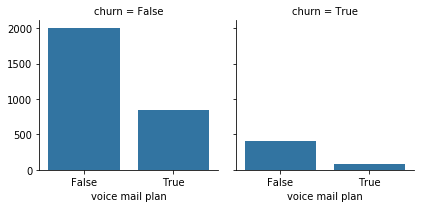

In [52]:
g = sns.FacetGrid(DataSet, col="churn")
g.map(sns.countplot, "voice mail plan" )

Como se puede observar aqu no influye mucho ya que las dos poblaciones estan bien balanceadas

C:\Users\Ernesto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


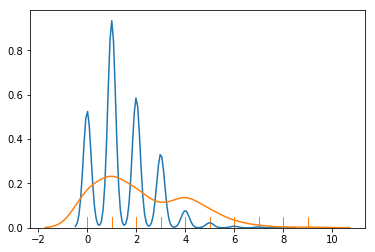

In [30]:
target_0 = DataSet.loc[DataSet['churn'] == False]
target_1 = DataSet.loc[DataSet['churn'] == True]


sns.distplot(target_0[['customer service calls']], hist=False, rug=True)
sns.distplot(target_1[['customer service calls']], hist=False, rug=True)

* Azul = Churn false.
* Amarillo = Churn negative.

Como podemos ver en esta grafica las personas que mas llamadas hacen a la compañia son las que se van, esto puede ser debido a que si tienen un problema o duda y se resuleve en la segunda o tercera llamada el cliente se va aquedar, pero como tenga que llamar mas de 4 es muy probable que el cliente se acabe marchando.

C:\Users\Ernesto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


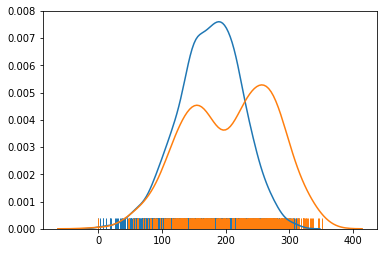

In [51]:
target_0 = DataSet.loc[DataSet['churn'] == False]
target_1 = DataSet.loc[DataSet['churn'] == True]


sns.distplot(target_0[['total day minutes']], hist=False, rug=True)
sns.distplot(target_1[['total day minutes']], hist=False, rug=True)

* Azul = Churn false
* Amarilla = Churn true

C:\Users\Ernesto\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


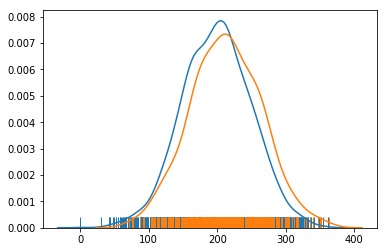

In [53]:
target_0 = DataSet.loc[DataSet['churn'] == False]
target_1 = DataSet.loc[DataSet['churn'] == True]


sns.distplot(target_0[['total eve minutes']], hist=False, rug=True)
sns.distplot(target_1[['total eve minutes']], hist=False, rug=True)

* azul = churn false
* amarillo = churn true
Aqui sucede los mismo que con 'voice mail plan', esta variable no afecta al numero de abandonos ya que son muy parecidas.

In [58]:
import sys
#!{sys.executable} -m pip install findspark
#!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install PyHamcrest

Para poder iniciar la segunda parte del proyecto debemos dividir nuestro set de datos en dos. Un set de entrenamoento y otro set de testeo. Como vemos en el set de datos inicial hay una gran diferencia entre los usuarios que deciden continuar en la compañia de telefono y la gente que decude irse. Por lo tanto cuando creamos nuestro set de entrenamiento y de testeo debemos mantener esta proporcion para tener unos resultados realistas. Despues hemos de cambiar los valores que son string a int debido a que o no se puede realizar la prediccion con strings o bien nos resultaria mas faccil realizarlo con enteros.

In [68]:
df = DataSet
cat_features = ['state','phone number']

from sklearn import preprocessing

for feature in cat_features:
    le = preprocessing.LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

print(df.shape)
df.head()

index = np.random.rand(len(df)) < 0.65
train = df[index]
test = df[~index]
print(train.shape)
print(test.shape)



(3333, 21)
(2133, 21)
(1200, 21)


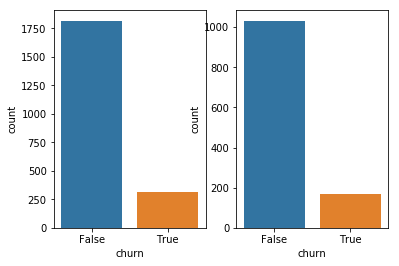

In [69]:
plt.figure()
plt.subplot(121)
sns.countplot(x ='churn', data=train)

plt.subplot(122)
sns.countplot(x ='churn', data=test)
plt.show()


Como podemos ver en las dos graficas se ha mantenido esa proporcion de usuarios que se van y de usuarios que se quedan.

A partir de aqui emepzamos la segunda parte del proyecto en la cual vamos a usar pyspark para podr realizar la prediccion.

Descargamos los paquetes necesarios para realizar la prediccion. Yo voy a usar los siguientes tres algoritmos:
* Decision tree
* Random forest 
* Supper vector machine



In [154]:
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vectors
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils

spark= SparkSession.builder.getOrCreate()
Spark_Train = spark.createDataFrame(train)
Spark_Test = spark.createDataFrame(test)
transformed_train = Spark_Train.rdd.map(lambda row: LabeledPoint(row[-1], Vectors.dense(row[0:-1])))
transformed_test = Spark_Test.rdd.map(lambda row: LabeledPoint(row[-1], Vectors.dense(row[0:-1])))

Como vamos a usar pysaprk deebemos para nuestro dataframe a formato RDD.
Entonces tranformamos nuestro dos set de datos que teniamos anteriormente, el set de train y el de test.

In [155]:
model_tree = DecisionTree.trainClassifier(transformed_train, numClasses=2, categoricalFeaturesInfo={},
                                    impurity='gini', maxDepth=5, maxBins=32)

En model_tree guardamos nuestro set entrenado y ahora en la siguiente celda comparariamos nuestro set entrenado con el set que tenemos de testing.

In [159]:
predictions_tree = model_tree.predict(transformed_test.map(lambda x: x.features))
labelsAndPredictions_tree = transformed_test.map(lambda lp: lp.label).zip(predictions_tree)


In [160]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
metrics_tree = BinaryClassificationMetrics(labelsAndPredictions_tree)




In [161]:
print("Area under PR = %s" % metrics_tree.areaUnderPR)
print("Area under ROC = %s" % metrics_tree.areaUnderROC)

Area under PR = 0.6269797178130512
Area under ROC = 0.8926969222743871


Como podemos observar nos ha salido un resultado bastante bueno ya que casi se aproxima al 90%, esto quiere decir que en el 89,2% de los casos nuestro algoritmo de decision tree acertara con la decision que tome el cliente.

A continuacion haremos lo mismo con el random forest. Empezando por entrenar nuestro set de datos.

In [151]:
from pyspark.mllib.tree import RandomForest


model_RF = RandomForest.trainClassifier(transformed_train, numClasses=2, categoricalFeaturesInfo={}, \
    numTrees=6, featureSubsetStrategy="auto", impurity="gini", \
    maxDepth=15, maxBins=4, seed=1234)

predictions_RF = model_RF.predict(transformed_test.map(lambda x: x.features))
labelsAndPredictions_RF = transformed_test.map(lambda lp: lp.label).zip(predictions_RF)
metrics_RF = BinaryClassificationMetrics(labelsAndPredictions_RF)




In [150]:
print("Area under PR = %s" % metrics_RF.areaUnderPR)
print("Area under ROC = %s" % metrics_RF.areaUnderROC)

Area under PR = 0.3401580459770115
Area under ROC = 0.694933812714496


Viendo los resultado del random forest podemos concluir que no es un mal resultado pero no es lo suficientemente fiable como para usarlo.

Por ultimo vamos a usar el super vector machine.

In [126]:
from pyspark.mllib.classification import SVMWithSGD, SVMModel
model_SVM = SVMWithSGD.train(transformed_train, iterations=100)
predictions_SVM = model_SVM.predict(transformed_test.map(lambda x: x.features))


In [136]:
labelsAndPreds_SVM = transformed_test.map(lambda p: (p.label, model_SVM.predicT(p.features)))
testErr = labelsAndPreds_SVM.filter(lambda lp: lp[0] != lp[1]).count() / float(transformed_test.count())
print("Test Error = " + str(testErr))


Test Error = 0.14


Como podemos ver tiene un buen acierto ya que solo tiene un error del 14% pero aun asi no supera el acierto del decision tree, por lo tanto nos quedaremos con el decision tree y veremos sus resultados mas a fondo.

In [169]:
#tp = df[(df.target_index == 1) & (df.prediction == 1)].count()
metrics = MulticlassMetrics(labelsAndPredictions_tree)
confusion_mat = metrics.confusionMatrix()
print(confusion_mat)

DenseMatrix([[1010.,   55.],
             [  22.,  113.]])


A continuacion voy a explicar a que se deben estos resultados. El numero de arriba a la izquierda, es decir, el 1010, es el numero de aciertos que tiene nuestro algoritmo en cuanto a gente que no abandona. El 55 y el 22 son los resultados en donde nuestro algoritmo falla, el 55 es cuando nuestro algoritmo predice que se van pero en realidad se quedan y el 22 es cuando predice que no abandonan pero en realidad abandonan. Y por ultimo el 113 es cuando nuestro algoritmo predice que los usuarios van a abandonar y abandonan. Nuestro principal problema son los 22 que tenemos abajo a la izquierdo porque son clientes que van a marcharse pero nosotros pensamos que se van a quedar, por lo tanto ese es el error que debemos de solucionar. Hemos escogido el decision tree debido a que es el que menos error da en cuanto a false negative.